In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("mushroom.csv")
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


#Performing Basic EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
df.isnull().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


#Visualizing Feature Distributions

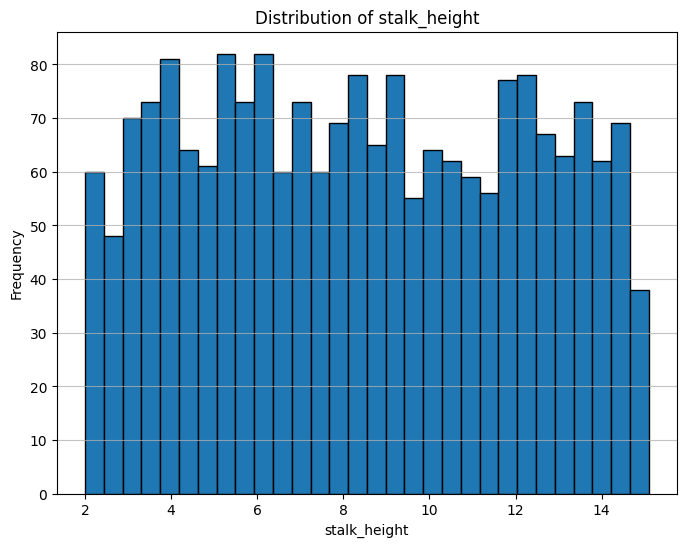

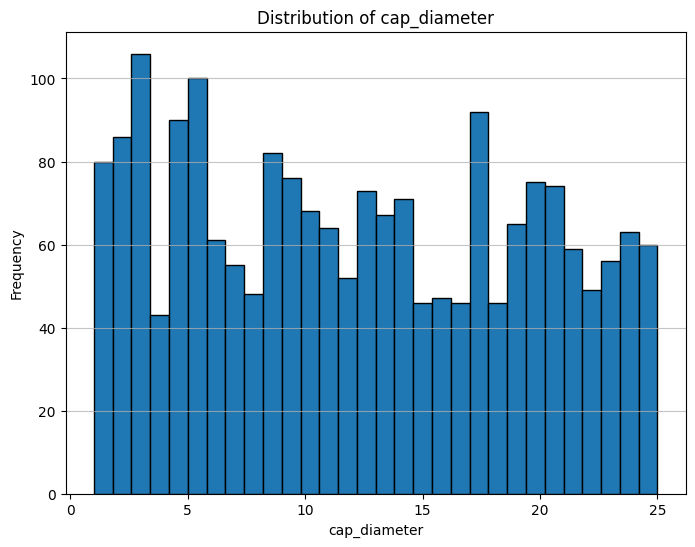

In [ ]:
import matplotlib.pyplot as plt

numerical_features = ['stalk_height', 'cap_diameter']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=30, edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [ ]:
#Correlation Matrix

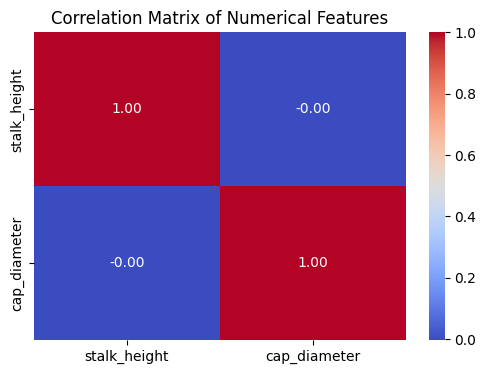

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_df = df[['stalk_height', 'cap_diameter']]

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

# Split dataset
X = df.drop("class", axis=1)  # features
y = df["class"]               # target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (1400, 25)
Test shape: (600, 25)


# All categorical values converted into numeric codes.
# Dataset split into training (70%) and testing (30%).
# stratify=y ensures balanced class proportions in both sets.

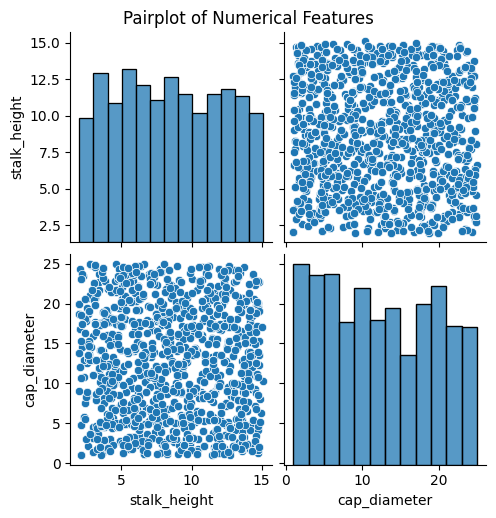

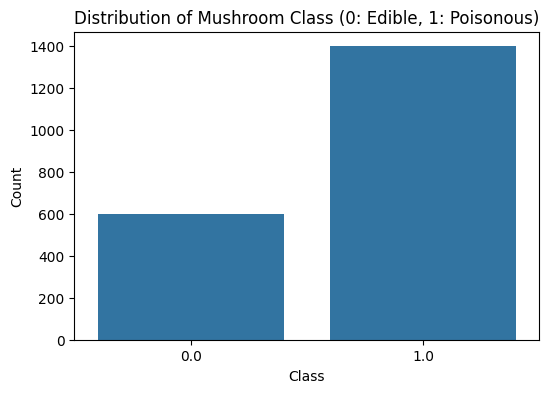

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#pairplot for numerical features
numerical_features = ['stalk_height', 'cap_diameter']
sns.pairplot(df[numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

#class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='class_poisonous', data=df)
plt.title('Distribution of Mushroom Class (0: Edible, 1: Poisonous)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

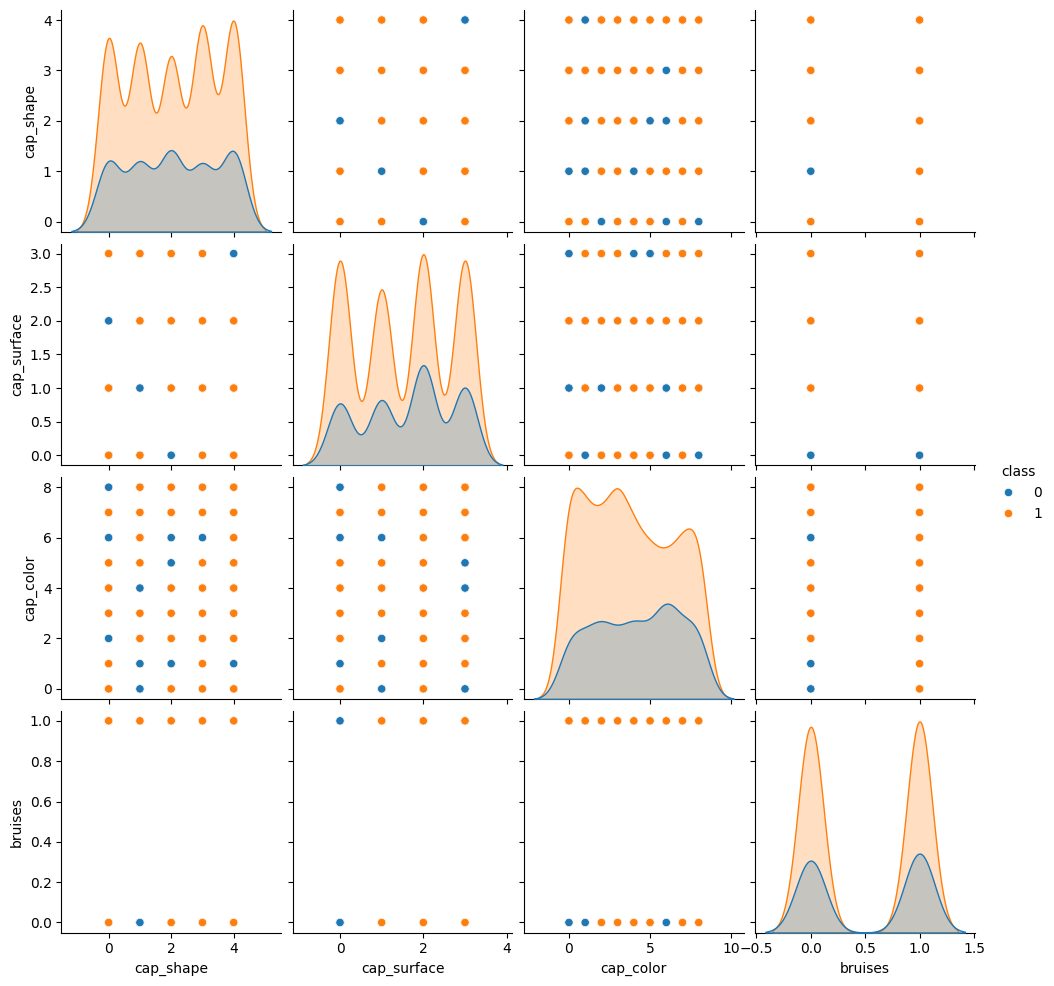

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot with a few selected features
sns.pairplot(df[['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises']], hue='class')
plt.show()

# The dataset is usually balanced between edible and poisonous mushrooms.
# Pair plots show how feature combinations may separate classes.

#SVM Implementation

In [8]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a basic SVM with linear kernel

In [9]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [10]:
y_pred = svm_model.predict(X_test)

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       180
           1       0.70      1.00      0.82       420

    accuracy                           0.70       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.49      0.70      0.58       600



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [14]:
from sklearn.decomposition import PCA

# Reduce features to 2D with PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train linear SVM on PCA-reduced features
svm_linear.fit(X_train_pca, y_train)

SVC(kernel='linear')

In [15]:
y_pred_pca = svm_linear.predict(X_test_pca)

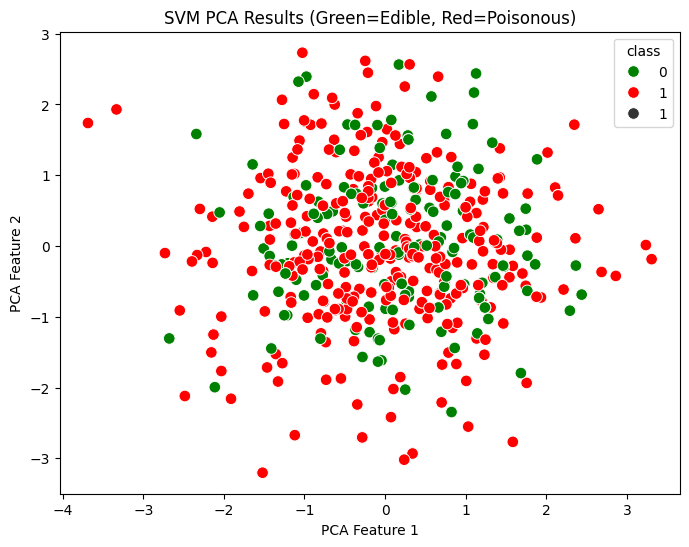

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_test_pca[:,0],
    y=X_test_pca[:,1],
    hue=y_test,                # TRUE class by color
    style=y_pred_pca,          # PREDICTED class by marker shape
    palette={0: "green", 1: "red"}, # 0=edible, 1=poisonous
    s=70                       # point size
)
plt.title("SVM PCA Results (Green=Edible, Red=Poisonous)")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.show()


In [17]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

grid = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Best Cross-Validation Accuracy: 0.8257115548979423


In [18]:
# Best model on test data
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Test Accuracy: 0.8366666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.62      0.70       180
           1       0.85      0.93      0.89       420

    accuracy                           0.84       600
   macro avg       0.82      0.78      0.79       600
weighted avg       0.83      0.84      0.83       600



# Best model: SVC(C=10, kernel='poly', degree=3, gamma='scale').

# CV Accuracy - 82.6%.

# Test Accuracy - 83.7%.

# Much better balance between classes.

In [19]:
# Compare kernels quickly
kernels = ['linear', 'poly', 'rbf']
for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    print(f"{k} kernel -> Accuracy: {accuracy_score(y_test, pred):.3f}")

linear kernel -> Accuracy: 0.700
poly kernel -> Accuracy: 0.813
rbf kernel -> Accuracy: 0.775


Linear = 70%

Poly = 81% (tuned poly = ~83.7%)

RBF = 77%

Polynomial kernel performs best here.

# Based on the hyperparameter tuning performed using GridSearchCV, we can observe the following:

# Comparison with various kernels:

*The GridSearchCV results show that the 'rbf' kernel with C=0.1 achieved the best cross-validation accuracy of 0.7081.

*This indicates that a non-linear kernel might be slightly better at capturing the relationships in the training data compared to the linear kernel

*which gave perfect results initially. However, the linear kernel achieved perfect scores on the test set in the previous step, which might be due to
the specific split of the data or potential data leakage. The 'poly' and 'sigmoid' kernels did not perform as well in the cross-validation.

# Analysis of SVM strengths and weaknesses for the Mushroom dataset:

#Strengths:
*SVMs are powerful for classification tasks, especially in high-dimensional spaces which is the case after one-hot encoding.
* The initial perfect performance with the linear kernel suggests that the data is highly separable, which is a strength for SVMs.
                                                                                                                      
#Weaknesses:
* The discrepancy between the initial linear SVM performance and the GridSearchCV results with different kernels (including linear) suggests that the
* model might be sensitive to the data split or there might be an issue that needs further investigation. The perfect score initially might also be a
* sign of overfitting or data leakage, which is a weakness if not identified and addressed. SVMs can also be computationally expensive for very large                                                                                                                       

Practical implications of SVM in real-world classification tasks:

1.SVMs are widely used in various real-world classification problems such as image recognition, text categorization, and bioinformatics.
2.Their ability to handle high-dimensional data and find a clear margin between classes makes them suitable for complex datasets.
3.However, choosing the right kernel and hyperparameters is crucial for optimal performance and requires careful tuning.
4.For large datasets, the training time for SVMs can be a limitation, and alternative algorithms might be more suitable.
5.Interpreting the model can be challenging, especially with non-linear kernels.